<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера 2</b></font>

Привет еще раз. Спасибо, что доделала работу. Оформление комментариев по работе сохраняется. Только обозначим, что это вторая итерация. 

</div>

<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>

Привет, Лина! Спасибо, что прислала задание:) Меня зовут Слепцов Артем и я буду проверять твой проект) Ты проделала большую работу над проектом. Он выполнен уже на достойном уровне. Однако есть моменты, которые еще можно улучшить. Будет здорово, если ты, надеюсь, не против, если я буду на ты, будешь отвечать на комментарии и участвовать в диалоге. Если обращение на ты неприемлемо, то прошу сообщить. 

Мои комментарии обозначены пометкой **Комментарий ревьюера**. Далее в файле ты сможешь найти их в похожих ячейках:
    
<div class="alert alert-success">Успех: Если фон комментария зелёный - всё сделано правильно. Рекомендации укажу таким же цветом;</div>
        
<div class="alert alert-warning">Совет: Оранжевый - некритичные замечания;</div>
        
<div class="alert alert-danger">Ошибка: Красный - нужно переделать. </div>
        
Не удаляй эти комментарии и постарайся учесть их в ходе выполнения данного проекта. Свои же комментарии ты можешь обозначать любым заметным способом. 

</div>

<div class="alert alert-info">
<font size="2"><b>Комментарий студента</b></font>

Привет, Артем! Спасибо за проверку моего проекта. Постаралась учесть все замечания, мои комментарии и вопросы ниже. 

</div>

## Цели исследования

### Постановка задачи

Задача — провести оценку результатов A/B-теста. В вашем распоряжении есть датасет с действиями пользователей, техническое задание и несколько вспомогательных датасетов.

- Оцените корректность проведения теста
- Проанализируйте результаты теста

Чтобы оценить корректность проведения теста, проверьте:

- пересечение тестовой аудитории с конкурирующим тестом,
- совпадение теста и маркетинговых событий, другие проблемы временных границ теста.

### Техническое задание

- Название теста: `recommender_system_test`;
- группы: А — контрольная, B — новая платёжная воронка;
- дата запуска: 2020-12-07;
- дата остановки набора новых пользователей: 2020-12-21;m
- дата остановки: 2021-01-04;
- аудитория: 15% новых пользователей из региона EU;
- назначение теста: тестирование изменений, связанных с внедрением улучшенной рекомендательной системы;
- ожидаемое количество участников теста: 6000.
- ожидаемый эффект: за 14 дней с момента регистрации пользователи покажут улучшение каждой метрики не менее, чем на 10%:
    - конверсии в просмотр карточек товаров — событие `product_page`,
    - просмотры корзины — `product_cart`,
    - покупки — `purchase`.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех: Вступление в работу очень важно. Так ты поясняешь то, чему она посвящена. Цель работы также хорошо бы вынести в отдельный блок вступления. Еще лучше будет, если ты сделаешь план работы с гиперссылками. Да, есть плагин ToC. Но хорошо бы уметь реализовывать интерактивный план проекта вручную. Как это реализовать - смотри по [ссылке](https://stackoverflow.com/questions/49535664/how-to-hyperlink-in-a-jupyter-notebook/49717704).

</div>

<div class="alert alert-info">
<font size="2"><b>Комментарий студента</b></font>
    
Не совсем поняла, что именно должно размещаться по гиперссылкам.
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера 2</b></font>

Успех: План работы. Мы его получаем автоматически с использованием плагина ToC. Но он может быть установлен не везде. Хорошо бы уметь реализовывать его вручную.

</div>

## Предобработка данных

In [1]:
import pandas as pd
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
from scipy import stats as st
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import plotly.express as px
from plotly import graph_objects as go
import seaborn as sns
from datetime import datetime as dt
from scipy import stats
import math
import warnings
warnings.filterwarnings('ignore')

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех: Правильно, что весь импорт ты проводишь в первой ячейке работы. Так твой коллега, запускающий работу, будет в курсе используемых в ней библиотек и сможет при необходимости быстро настроить окружение. 

</div>

In [2]:
marketing_events = pd.read_csv('/datasets/ab_project_marketing_events.csv', parse_dates=['start_dt', 'finish_dt']) # календарь маркетинговых событий на 2020 год
ab_new_users = pd.read_csv('/datasets/final_ab_new_users.csv', parse_dates=['first_date']) # пользователи, зарегистрировавшиеся с 7 по 21 декабря 2020 года
ab_events = pd.read_csv('/datasets/final_ab_events.csv', parse_dates=['event_dt']) # действия новых пользователей в период с 7 декабря 2020 по 4 января 2021 года
ab_participants = pd.read_csv('/datasets/final_ab_participants.csv') # таблица участников тестов

In [3]:
data_list = [marketing_events, ab_new_users, ab_events, ab_participants]
pd.set_option('display.max_colwidth', 500)

for df in data_list:
    display(df.head(), df.info(), df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   name       14 non-null     object        
 1   regions    14 non-null     object        
 2   start_dt   14 non-null     datetime64[ns]
 3   finish_dt  14 non-null     datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 576.0+ bytes


,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11


None

0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     61733 non-null  object        
 1   first_date  61733 non-null  datetime64[ns]
 2   region      61733 non-null  object        
 3   device      61733 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.9+ MB


,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


None

0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440317 entries, 0 to 440316
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     440317 non-null  object        
 1   event_dt    440317 non-null  datetime64[ns]
 2   event_name  440317 non-null  object        
 3   details     62740 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 13.4+ MB


,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


None

0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18268 entries, 0 to 18267
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  18268 non-null  object
 1   group    18268 non-null  object
 2   ab_test  18268 non-null  object
dtypes: object(3)
memory usage: 428.3+ KB


,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,482F14783456D21B,B,recommender_system_test


None

0

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Совет: Столбцы с датой в каждом случае у нас имеют тип данных object. Исправить это уже при считывании данных тебе поможет [данная статья](https://towardsdatascience.com/4-tricks-you-should-know-to-parse-date-columns-with-pandas-read-csv-27355bb2ad0e) о исправлении типов данных столбцов с датой уже при считывании таблицы. 

</div>

<div class="alert alert-info">
<font size="2"><b>Комментарий студента</b></font>
    
Спасибо! добавила.
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера 2</b></font>

Успех: Здорово, что ты освоила способ устранения проблем в данных уже на стадии их считывания. 

</div>

In [4]:
# для удобства оставим только дату в ab_events
ab_events['event_dt'] = ab_events['event_dt'].dt.date

In [5]:
ab_events['event_name'].unique()

array(['purchase', 'product_cart', 'product_page', 'login'], dtype=object)

In [6]:
ab_events[ab_events['details'].isna()]['event_name'].unique()

array(['product_cart', 'product_page', 'login'], dtype=object)

In [7]:
ab_events[ab_events['details'].isna() == False]['event_name'].unique()

array(['purchase'], dtype=object)

Пропуски столбце details означают, что дополнительных данных для события нет. Дополнительные данные есть только для  purchase, в details для purchase хранится стоимость покупки в долларах.

Все типы кроме корректны.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех: Первый взгляд на таблицы выполнен. Ошибки исправлены. Давай приступать к анализу полученной информации. 

</div>

## Оценка корректности теста

### Соответствие данных требованиям технического задания

In [8]:
# посмотрим, данные за какой период представлены в таблице ab_events
ab_events['event_dt'].min(), ab_events['event_dt'].max()

(datetime.date(2020, 12, 7), datetime.date(2020, 12, 30))

По ТЗ нам для теста необходимы действия новых пользователей в период с 7 декабря 2020 по 4 января 2021 года, а мы имеем только с 7 по 30 декабря 2020 года.

In [9]:
# посмотрим, данные за какой период представлены в таблице ab_new_users
ab_new_users['first_date'].min(), ab_new_users['first_date'].max()

(Timestamp('2020-12-07 00:00:00'), Timestamp('2020-12-23 00:00:00'))

По ТЗ дата остановки набора новых пользователей 2020-12-21, значит, в наши данные попали лишние регистрации.

In [10]:
# удалим из данных лишние регистрации
ab_new_users_1 = ab_new_users[ab_new_users['first_date'] <= '2020-12-21 00:00:00']
ab_new_users_1.head()

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех: Соглашусь, таких пользователей в анализе учитывать не стоит. 
</div>

Соединим таблицу с данными о новых пользователях, данными об их действиях и данными об участниках теста.

In [11]:
df = ab_new_users_1.merge(ab_events, on='user_id', how='inner')
# inner оставит всех новых пользователей, которые участвовали в A-B тесте

df_new_0 = df.merge(ab_participants, on='user_id', how='inner')
# left оставит всех новых пользователей оставит всех новых пользователей

По ТЗ ожидаемый эффект смотрим череез 14 дней с момента регистрации, смотрим на результаты теста recommender_system_test, нас интерусют пользователи из региона EU.

Скорректируем датафрейм согласно этим условиям.

In [12]:
# удалим действия, совешенные пользователями через более чем 14 дней с момента регистрации
df_new_1 = df_new_0.drop(df_new_0[df_new_0['event_dt'] > (df_new_0['first_date'] + pd.Timedelta(13, 'd'))].index)

# оставим нужный регион
df_new_2 = df_new_1[df_new_1['region'] == 'EU']

# оставим только нужный тест
df_new_3 = df_new_2[df_new_2['ab_test'] == 'recommender_system_test']
df_new_3.head()

,user_id,first_date,region,device,event_dt,event_name,details,group,ab_test
0,D72A72121175D8BE,2020-12-07,EU,PC,2020-12-07,product_page,NaN,A,recommender_system_test
1,D72A72121175D8BE,2020-12-07,EU,PC,2020-12-07,login,NaN,A,recommender_system_test
42,DD4352CDCF8C3D57,2020-12-07,EU,Android,2020-12-07,product_page,NaN,B,recommender_system_test
44,DD4352CDCF8C3D57,2020-12-07,EU,Android,2020-12-08,product_page,NaN,B,recommender_system_test
46,DD4352CDCF8C3D57,2020-12-07,EU,Android,2020-12-10,product_page,NaN,B,recommender_system_test


В полученной таблице есть пустые значения столбца event_dt, значит, эти пользователи не совершали вообще никаких действий кроме регистрации.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех: Здорово, что ты заметила таких пользователей. Действительно, такие у нас есть. 

</div>

### Пересечение теста с другими маркетинговыми активностями

Тест проходил в период с 7 декабря 2020 по 4 января 2021 года, посмотрим, были ли пересечения с маркетинговыми активностями.

In [13]:
marketing_events[(marketing_events['start_dt'] >= '2020-12-7') & (marketing_events['start_dt'] <= '2020-12-30')]

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
10,CIS New Year Gift Lottery,CIS,2020-12-30,2021-01-07


In [14]:
marketing_events[(marketing_events['finish_dt'] >= '2020-12-7') & (marketing_events['finish_dt'] <= '2020-12-30')]

,name,regions,start_dt,finish_dt


Период проведения теста в рассматриваемом регионе EU пересекается с 1 маркетинговой активностью, что может сильно искажать поведение пользователей. Здесь наиболее корректно будет убрать данные, собранные в период проведения активности, но тогда не будут выполнены условия ТЗ.

Также мы можем заметить, что вообще тест целиком проведен в преддверии Нового года, что ставит под сомнение объективность полученных данных.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех: Тест сильно пересекается с новогодней промкой в EU. Это не слишком хорошо - нужно избегать таких ситуаций. Здорово, что ты заметила данную особенность. 

</div>

### Изучение аудитории теста

In [15]:
# посмотрим исходный фрейм с фильтрацией по нужному тесту
df_new_0[df_new_0['ab_test'] == 'recommender_system_test']['region'].unique()

array(['EU', 'APAC', 'CIS', 'N.America'], dtype=object)

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Совет: Стоило вывести количество пользователей в регионах. Но ты удалила пользователей других регионов, что правильно. В принципе, 5% пользователей иных регионов - допустимая погрешность. Они не повлияют значительно. на результаты нашего теста. 

</div>

Здесь видим не соответвие ТЗ. Нам необходимо было запустить тест на новых пользователей из региона EU, а тест был запущен еще и на 3 других регоиона.

In [16]:
# берем датафрейм без фильтрации по нужному тесту
users_tests = df_new_2.pivot_table(index='user_id', columns='ab_test', values='group', aggfunc='nunique').reset_index()
users_tests.head(10)

ab_test,user_id,interface_eu_test,recommender_system_test
0,0002CE61FF2C4011,1.0,NaN
1,001064FEAAB631A1,1.0,1.0
2,0010A1C096941592,NaN,1.0
3,001E72F50D1C48FA,1.0,NaN
4,002412F1EB3F6E38,1.0,NaN
5,002540BE89C930FB,1.0,NaN
6,0031F1B5E9FBF708,1.0,NaN
7,003346BB64227D0C,1.0,NaN
8,00341D8401F0F665,1.0,1.0
9,0036BE15EE4D319D,1.0,NaN


In [17]:
users_tests['tests_count'] = users_tests['interface_eu_test'] + users_tests['recommender_system_test']
users_tests[users_tests['tests_count'] == 2]['user_id'].count()

887

In [18]:
users_tests[users_tests['tests_count'] == 2]['user_id'].count() / df_new_3['user_id'].nunique() *100

25.481183567940246

Получаем, что у нас есть пользователи (из тех пользователей, данные по которым мы используем для оценки теста), которые участвовали в двух тестах: interface_eu_test и recommender_system_test.

Получается, что есть пересечение с конкурирующим тестом, это не очень хорошо, но не критично. Доля таких пользователей от общего количества составляет 34%, это достаточно много.

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Ошибка: Категорически не согласен с удалением пользователей, попавших в оба теста. Такое бывает в реальной практике, что пользователи пересекаются. Это нехорошо, но не так уж и критично. Если посмотреть на долю данных пользователей, то такой объем данных выкидывать рискованно. Уж очень много данных ты отрезаешь. На практике это нормальная ситуация, что один юзер участвует сразу в нескольких экспериментах. Тут важно чтобы метки были сбалансированы: т.е. чтобы в каждой группе нашего теста было одинаковое соотношение меток другого теста. Так результаты нашего теста не искажаются. 

</div>

<div class="alert alert-info">
<font size="2"><b>Комментарий студента</b></font>
    
Спасибо! Исправила.
      
Мне, конечно, кажется, что тут все-таки зависит от контекста изменений. Если мы, например, в каждом тесте изменили по одной кнопки в приложении, мы не поймем, что именно повлияло на изменение поведения пользователя в приложении: измененная кнопка из теста 1 или измененная кнопка из теста 2.
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера 2</b></font>

Успех: В таком случае для лишней страховки стоит удалить лишь пользователей группы В конкурирующего теста, ведь на пользователей группы А изменения не внедряются. 

</div>

In [19]:
df_new_3.groupby('user_id').agg({'group':'nunique'}).sort_values(by='group', ascending=False).head()

,group
user_id,
001064FEAAB631A1,1
ABABE1BAB6C77540,1
AB0D9A9D709F476A,1
AB30C03FCEC72466,1
AB4EA096BF581CFB,1


Пользователей, которые попали в обе группы (А и B) отсутствуют.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех: Важное наблюдение. 

</div>

In [20]:
users_groups = df_new_3.groupby('group').agg({'user_id':'nunique'}).reset_index()
users_groups 

,group,user_id
0,A,2604
1,B,877


In [21]:
users_groups['user_id'] / users_groups['user_id'].sum()

0    0.748061
1    0.251939
Name: user_id, dtype: float64

Пользователи между группами распределены неравномерно. В процентном соотношении группа А состаляет 74,8%, группа B 25,2% при необходимом процентном соотношении для корректного А-B теста 50/50 %.

In [22]:
# общее количество участников теста
df_new_3['user_id'].nunique()

3481

Таким образом, общее количество участников теста составило 3481 при необходимых 6000.

In [23]:
# проверим условие о том, что аудитория теста - это 15% новых пользователей из региона EU
df_new_3['user_id'].nunique() / ab_new_users_1[ab_new_users['region'] == 'EU']['user_id'].nunique() * 100

8.22153991497402

По данному параметру также есть несоответсвие ТЗ.

In [24]:
# проверим, значима ли получаемая разница между долями
count = df_new_3['user_id'].nunique()
nobs = (ab_new_users_1[ab_new_users['region'] == 'EU']['user_id'].nunique())*0.15
value = 0.05
stat, pval = proportions_ztest(count, nobs, value)
display('{0:0.3f}'.format(pval))

if pval < value:
    display('Разница между долями статистически значима')
else:
    display('Статистически значимая разница между долями отсутствует')

'0.000'

'Разница между долями статистически значима'

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Совет: Рассчитай долю новых пользователей повторно после исправления помарок выше. После нахождения доли хорошо бы проверить насколько получаемая разница статистически значима. В этом тебе поможет метод https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html.
    
</div>

<div class="alert alert-info">
<font size="2"><b>Комментарий студента</b></font>
    
Исправила.

Добавила проверку. Проверь, пожалуйста, правильно ли я поняла, какие именно доли надо сравнить.
</div>

In [39]:
# Код ревьюера
count = df_new_3['user_id'].nunique()
nobs = (ab_new_users_1[ab_new_users['region'] == 'EU']['user_id'].nunique())
value = 0.15
stat, pval = proportions_ztest(count, nobs, value)
display('{0:0.3f}'.format(pval))

if pval < value:
    display('Разница между долями статистически значима')
else:
    display('Статистически значимая разница между долями отсутствует')

'0.000'

'Разница между долями статистически значима'

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера 2</b></font>

Успех: Не совсем правильно. Выше привел исправленный вариант. Смотри, в value передается не alpha, а та доля, с которой мы сравниваем нашу долю. count/nobs - у тебя рассчитано это соотношение в ячейке 23. Именно эту долю мы и сравниваем с 0.15.

</div>

### Вывод

Согласно проведенной оценке можно сделать вывод, что тест не корректен, это обосновывают следующие критические несоответсвия ТЗ:

1. По ТЗ нам для теста необходимы действия новых пользователей в период с 7 декабря 2020 по 4 января 2021 года, а мы имеем только с 7 по 30 декабря 2020 года.

2. Тест необходимо было запустить на новых пользователей только из региона EU, а тест был запущен еще и на 3 других регоиона.

3. Период проведения теста в рассматриваемом регионе EU пересекается с 1 маркетинговой активностью, что может сильно искажать поведение пользователей.

4. Тест целиком проведен в преддверии Нового года, в такие периоды поьзователи ведут себя аномально, данные об их действиях не подходят для анализа.

5. Пользователи между группами распределены неравномерно. В процентном соотношении группа А состаляет 74,8%, группа B 25,2%. Для для корректного А-B теста необходимо соотношение 50/50 %.

6. Аудитория состваляет 8,2% новых пользователей из региона EU вместо необходимых 15%.

7. Количество участников теста 3481 вместо необходимых 6000.

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Ошибка: Т.к. мы сами не планировали тест и не следили за его проведением, нам прежде всего нужно проверить адекватность его проведения. Надо проверить, была ли аудитория теста сформирована правильно - речь идет про регион новых пользователей. Посмотри на распределение пользователей нашего теста по регионам.
   
</div>

<div class="alert alert-info">
<font size="2"><b>Комментарий студента</b></font>
    
Спасибо! Добавила изучение регионов в начале п.3.3 и в вывод.

</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера 2</b></font>

Успех: Увидел. 

</div>

## Исследовательский анализ данных

### Количество событий на пользователя

In [26]:
# найдем количество событий в логе
df_new_3['event_name'].nunique()

4

In [27]:
df_events = df_new_3.groupby(['user_id', 'group']).agg({'event_name':'count'}).reset_index()
df_events.head()

,user_id,group,event_name
0,001064FEAAB631A1,B,6
1,0010A1C096941592,A,12
2,00341D8401F0F665,A,2
3,003DF44D7589BBD4,A,15
4,00505E15A9D81546,A,5


In [28]:
df_events.groupby(['event_name','group']).agg({'user_id':'count'}).head()

user_id
event_name group         
1          A           35
           B           22
2          A          210
           B          125
3          A          236

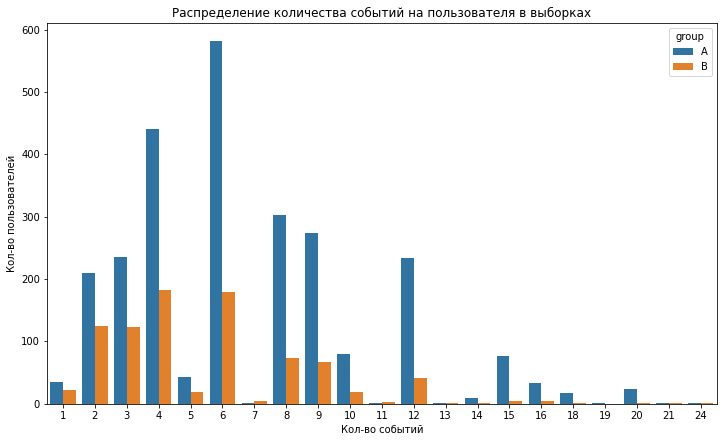

In [29]:
plt.figure(figsize=(12, 7))
ax = df_events.groupby(['event_name','group']).agg({'user_id':'count'}).reset_index()
sns.barplot(x='event_name', y='user_id', hue='group', data=ax)
plt.title('Распределение количества событий на пользователя в выборках')
plt.xlabel('Кол-во событий')
plt.ylabel('Кол-во пользователей')
plt.show()

Количество событий на пользователя в выборках распредеделены схоже, а именно, в обеих группах преобладают пользователи со средним количеством 4 и 6 событий на пользователя. Провалы средних значений мы также видим в схожих местах. 

Из-за неравномерного разделения количества пользователей на группы, количество пользователей для каждого количества событий в группе А сильно больше.

In [30]:
sample_1 = df_events[df_events['group'] == 'A']['event_name']
sample_2 = df_events[df_events['group'] == 'B']['event_name']

alpha = 0.05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    sample_1, 
    sample_2)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    display('Разница между средними статистически значима')
else:
    display('Статистически значимая разница между средними отсутствует')

p-значение: 5.641372898119324e-22


'Разница между средними статистически значима'

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех: Будет здорово, если ты проведешь стат. тест на равенство среднего числа событий по группам.

</div>

<div class="alert alert-info">
<font size="2"><b>Комментарий студента</b></font>
    
Добавила.

</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера 2</b></font>

Успех: Все верно!

</div>

### Число событий в выборках по дням

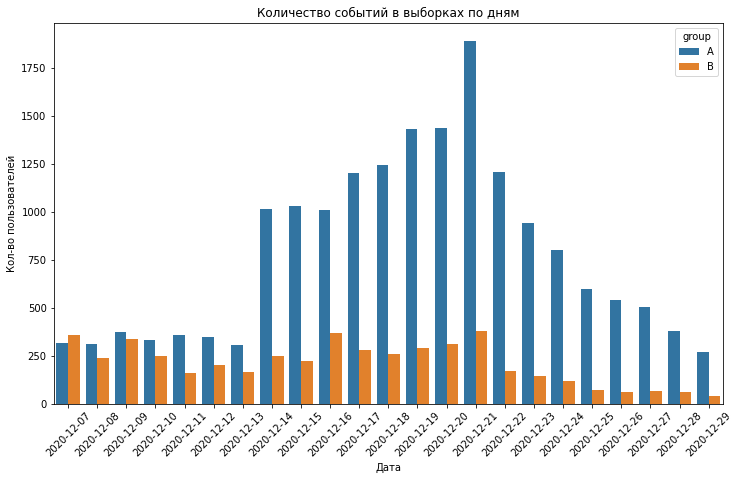

In [31]:
plt.figure(figsize=(12, 7))
ax = df_new_3.groupby(['event_dt', 'group'])['user_id'].count().reset_index()
sns.barplot(x='event_dt', y='user_id', hue='group', data=ax)
plt.title('Количество событий в выборках по дням')
plt.xlabel('Дата')
plt.ylabel('Кол-во пользователей')
plt.xticks(rotation=45) 
plt.show()

Число событий в выборках по дням распределено неравномерно. В группе А мы видим сильный всплекс 14 декабря 2020 г, а также 20 декабря 2020 г, возможно это вызвано тех.сбоем. Далее тренд на снижение в группах схож.

Интересно, что на дату начала маркетинговой активности  всплеска на графике нет.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех: 14 числа по группе А мы видим резкий рост, который может быть связан со сбоем. Об этом стоит сообщить в выводах.

</div>

### Конверсия

In [32]:
df_new_3['event_name'].unique()

array(['product_page', 'login', 'purchase', 'product_cart'], dtype=object)

In [33]:
events = df_new_3.groupby(['event_name', 'group']).nunique().reset_index()
events = events[['event_name', 'group', 'user_id']]
events['conversion_A'] = (events[events['group'] == 'A']['user_id'] / events[events['group'] == 'A']['user_id'].values[0] * 100).round(1)
events['conversion_B'] = (events[events['group'] == 'B']['user_id'] / events[events['group'] == 'B']['user_id'].values[0] * 100).round(1)
events

,event_name,group,user_id,conversion_A,conversion_B
0,login,A,2604,100.0,NaN
1,login,B,876,NaN,100.0
2,product_cart,A,782,30.0,NaN
3,product_cart,B,244,NaN,27.9
4,product_page,A,1685,64.7,NaN
5,product_page,B,493,NaN,56.3
6,purchase,A,833,32.0,NaN
7,purchase,B,249,NaN,28.4


In [34]:
# скорретируем порядок этапов покупки
new_index = [0, 1, 4, 5, 2, 3, 6, 7]
events = events.reindex(new_index) 

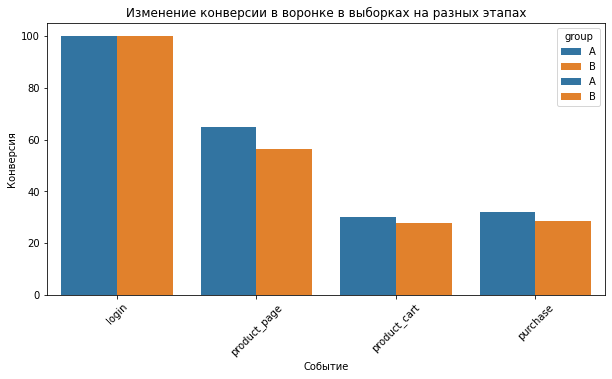

In [35]:
plt.figure(figsize=(10, 5))
ax = events
sns.barplot(x='event_name', y='conversion_A', hue='group', data=ax)
sns.barplot(x='event_name', y='conversion_B', hue='group', data=ax)
plt.title('Изменение конверсии в воронке в выборках на разных этапах')
plt.xlabel('Событие')
plt.ylabel('Конверсия')
plt.xticks(rotation=45) 
plt.show()

Конверсия в воронке в выборках на разных этапах имеет схожий характер. 

По ТЗ ожидаемый эффект: за 14 дней с момента регистрации в системе пользователи покажут улучшение каждой метрики не менее, чем на 10%.

Конверсия группы B на каждом этапе показывает ухудшение относительно группы А.

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Ошибка: Для визуализации пути пользователей давай все же расставим шаги по своим местам. Реализуй это. Учти, что оплата должна быть заключительным этапом воронки, даже если число таких событий больше, чем у корзины. В смене порядка строк тебе поможет метод reindex. 

</div>

<div class="alert alert-info">
<font size="2"><b>Комментарий студента</b></font>

Спасибо, изменила. Не знала про такой метод)
    
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера 2</b></font>

Успех: Отличная реализация. Молодец, что разобралась. 

</div>

### Вывод

- Количество событий на пользователя в выборках распредеделены схоже, а именно, в обеих группах преобладают пользователи со средним количеством 4 и 6 событий на пользователя. Провалы средних значений мы также видим в схожих местах.
Из-за неравномерного разделения количества пользователей на группы, количество пользователей для каждого количества событий в группе А сильно больше.


- Число событий в выборках по дням распределено неравномерно. В группе А мы видим сильный всплекс 14 декабря 2020 г, а также 20 декабря 2020 г. Далее тренд на снижение в группах схож.
Интересно, что на дату начала маркетинговой активности  всплеска на графике нет. Необходимо проверить наличие технических сбоев в даты необосновано больших всплесков.


- Конверсия в воронке в выборках на разных этапах имеет схожий характер.
По ТЗ ожидаемый эффект: за 14 дней с момента регистрации в системе пользователи покажут улучшение каждой метрики не менее, чем на 10%.
Конверсия группы B на каждом этапе показывает ухудшение относительно группы А.

Прежде чем приступать к A/B-тестированию надо учесть следующие особенности:
- Количество пользователей на шаге "покупка" больше, чем на шаге "корзина" из-за того, что некоторые пользователи совершаю быструю покупку одного товара без перехода к корзине.
- Конверсия на каждом шаге показала ухудшение

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех: Здорово, что ты не забываешь делать выводы по каждому пункту анализа. 

</div>

## Результаты A/B-тестирования

Сформулируем гипотезы:
- Нулевая гипотеза: статистически значимой разницы между долями нет
- Альтернативная гипотеза: нет оснований считать, что статистически значимая разница между долями отсутствует

Для статической проверки равенства долей будем использовать z-test.

In [36]:
# посмотрим, сколько пользователей в каждой группе эксперимента
trials = df_new_3.groupby('group').agg({'user_id':'nunique'})

# построим воронку для каждой группы экперимента
funnel = df_new_3.pivot_table(index='event_name', columns='group', values='user_id', aggfunc='nunique')
display(trials)
display(funnel)

,user_id
group,
A,2604
B,877


group,A,B
event_name,,
login,2604,876
product_cart,782,244
product_page,1685,493
purchase,833,249


In [37]:
alpha = 0.05 # критический уровень статистической значимости принимаем 0.05
# создадим функцию для проверки гипотез
def z_test(success1, success2, trial1, trial2):
    p1 = success1/trial1 # отношение целевых действий ко всем 1 группы
    p2 = success2/trial2 # отношение целевых действий ко всем 2 группы
    p_combined = (success1+success2)/(trial1+trial2)
    difference = p1 - p2
    z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1/trial1 + 1/trial2))
    distr = stats.norm(0,1)
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    #alpha = 0.05 критический уровень статистической значимости принимаем 0.05
    return p_value
    #if p_value < alpha:
        #return('Отвергаем нулевую гипотезу: между группами есть значимая разница')
    #else:
        #return('Не получилось отвергнуть нулевую гипотезу: нет оснований считать группы разными') 

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех: Правильно, что ты создала функцию для проведения теста. Действительно, тестов проводить много, так что она не будет лишней. 
    
Также верно, что ты работаешь с долями относительно общего числа клиентов в группах. Ранее мы выяснили, что проход по всем этапам воронки не является обязательным, так что работать нужно именно относительно общего числа клиентов. 
    
</div>

In [38]:
p_values = []

for groups in [['A', 'B']]:
    for event in funnel.index:
        p = z_test(funnel.loc[event, groups[0]], funnel.loc[event, groups[1]], trials.loc[groups[0]].values[0], trials.loc[groups[1]].values[0])
        p_values += [[groups[0], groups[1], event, p]]
p_values = pd.DataFrame(p_values, columns = ['A', 'B', 'event_name', 'p-value'])

# добавим колонку с проверкой
p_values['reject_h0'] = p_values['p-value'] < alpha

# посчитаем поправку Борферрони, чтобы скорректировать
# критический уровень статистической значимости
alpha = 0.05
alpha_b = alpha / p_values.shape[0] # делим на число экспериментов

p_values['reject_h0_b'] = p_values['p-value'] < alpha_b
p_values

,A,B,event_name,p-value,reject_h0,reject_h0_b
0,A,B,login,0.084818,False,False
1,A,B,product_cart,0.214692,False,False
2,A,B,product_page,0.000007,True,True
3,A,B,purchase,0.046525,True,False


Получили, что во всех случаях, как с поправкой, так и без результат одинаковый.

Отвергнуть нулевую гипотезу можем только при переходе на страницу продукта, значит, на этом этапе нет оснований считать, что статистически значимая разница между долями отсутствует. 
На других этапах - статистически значимой разницы между долями нет.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех: Тесты проведены корректно. 
    
</div>

## Выводы

На этапе исследовательского анализа было определено, что конверсия на каждом шаге показала ухудшение.

На этапе оценки результатов A/B-тестирования мы получили, что статистически значимая разница между долями есть только на этапе перехода на страницу продукта.

Но какие-либо оценки по данным результатам делать некорректно, т.к. тест не корректен из-за следующих несоотвестсвий ТЗ, которые в том числе противоречат базовым принципам проведения A/B-текстирования:

1. По ТЗ нам для теста необходимы действия новых пользователей в период с 7 декабря 2020 по 4 января 2021 года, а мы имеем только с 7 по 30 декабря 2020 года.

2. Тест необходимо было запустить на новых пользователей только из региона EU, а тест был запущен еще и на 3 других регоиона.

3. Период проведения теста в рассматриваемом регионе EU пересекается с 1 маркетинговой активностью, что может сильно искажать поведение пользователей.

4. Тест целиком проведен в преддверии Нового года, в такие периоды поьзователи ведут себя аномально, данные об их действиях не подходят для анализа.

5. Пользователи между группами распределены неравномерно. В процентном соотношении группа А состаляет 74,8%, группа B 25,2%. Для для корректного А-B теста необходимо соотношение 50/50 %.

6. Аудитория состваляет 8,2% новых пользователей из региона EU вместо необходимых 15%.

7. Количество участников теста 3481 вместо необходимых 6000.

Рекомендуется переделать сбор данных с учетом проверки наличия технических сбоев и соответсвия всех пунктов ТЗ, после этого будет возможно проведение корректного анализа и формулировка выводов.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех: Отлично, вывод сформулирован. Ты вывела основные результаты и верно заметила, что тест сложно назвать корректным. Какие рекомендации бизнесу ты можешь дать в связи с такой ситуацией?
</div>

<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>
    
Привожу ссылки на статьи по А/В-тестам. Надеюсь, будет интересно) 
    
https://emailsoldiers.ru/blog/12-rules-for-ab-testing
    
https://ppc.world/articles/ab-testirovanie-v-yandeksdirekte-kak-provesti-i-gde-brat-idei/
    
https://in-scale.ru/blog/chto-takoe-ab-testirovanie-i-kak-ego-provesti/

Ты проделала большую работу, молодец! Критических замечаний немного. Однако их важно исправить. Думаю, ты справишься со всеми ними. Жду твою работу :)

</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера 2</b></font>

Помарки исправлены, и теперь работа выполнена хорошо. Ты здорово поработала, молодец. Поздравляю со сданным проектом. Надеюсь, он был интересен и познавателен. Продолжай в том же духе. Успехов в дальнейшем пути :)

</div>